# Editorial Placements

![SegmentLocal](img/5.gif "segment")


![SegmentLocal](img/3.jpg "segment")

In [1]:
import os             
folder = "./data/Editorial Placement/"
txt_files = os.listdir(folder)   # imagine you're one directory above test dir
print(txt_files)

['Final Version of the Second Report on the Further Provision Necessary for Establishing Public Credit (Report on a National Bank), 13 December 1790.txt', 'Report on a Particular Statement of the Warrants Issued by the Late Superintendent of Finance, and by the Board of Treasury, [25 September 1789].txt', 'Report on Duties Arising on Tonnage, for the Year Ending September 30, 1790, [6 January 1791].txt', 'Report on Duties on Imports, [7 January 1791].txt', 'Report on the Estimate of Expenditures for 1792, 4 November 1791.txt', 'Report on the Petition of Benjamin Brown, [21 November 1792].txt', 'Report on the Petition of Catharine Greene, 26 December 1791.txt', 'Report on the Petition of George Blanchard, [21 November 1792].txt', 'Report on the Petition of Hugh Cunningham, [21 November 1792].txt', 'Report on the Petition of Joseph Ball and Isaac Ledyard, [21 November 1792].txt', 'Report on the Petition of Margaret Fisher, [21 November 1792].txt', 'Report on the Petition of Pitman Collin

In [2]:
import pandas as pd
corpus = []

for file_path in txt_files:
    with open(folder+file_path,encoding='utf8') as f_input:
        corpus.append(f_input.read())

print(corpus[0])

Treasury Department
December 13th, 1790
[Communicated on December 14, 1790]153
[To the Speaker of the House of Representatives]

In obedience to the order of the House of Representatives of the ninth day of August last,154 requiring the Secretary of the Treasury to prepare and report on this day such further provision as may, in his opinion, be necessary for establishing the public Credit

The said Secretary further respectfully reports

That from a conviction (as suggested in his report No. 1155 herewith presented) That a National Bank is an Institution of primary importance to the prosperous administration of the Finances, and would be of the greatest utility in the operations connected with the support of the Public Credit, his attention has been drawn to devising the plan of such an institution, upon a scale, which will intitle it to the confidence, and be likely to render it equal to the exigencies of the Public.

Previously to entering upon the detail of this plan, he entreats th

In [13]:
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
import os

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/acham/Desktop/robotmua-640cce327819.json"
#print('Credendtials from environ: {}'.format(os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')))
# Instantiates a client
client = language.LanguageServiceClient()
# The text to analyze

neg = 0
pos = 0
s_pos = 0
neu = 0

for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    response3 = client.classify_text(document)

    #print('Text: {}'.format(text))
    analysis = ''
    if sentiment.score == 0:
        analysis = 'Neutral'
        neu+=1
    elif sentiment.score < 0:
        analysis = 'Negative'
        neg+=1
    elif sentiment.score > 0 and sentiment.score < 0.5 :
        analysis = 'Slightly Positive'
        s_pos+=1
    else:
        analysis = 'Positive'
        pos+=1
    print('Document: '+ txt_files[i][:-4] )
    print('Sentiment Prediction: {}, Sentiment Analysis: {}'.format(sentiment.score, analysis))
    print("")
    print("")
sentiment_analysis = [pos, s_pos, neu, neg]
names_analysis = ["Positive", "Slightly Positive", "Neutral", "Negative"]


    #print('Sentiment: {}'.format(response))
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
    #print('Sentiment: {}'.format(response3))

Document: Final Version of the Second Report on the Further Provision Necessary for Establishing Public Credit (Report on a National Bank), 13 December 1790
Sentiment Prediction: -0.10000000149011612, Sentiment Analysis: Negative


Document: Report on a Particular Statement of the Warrants Issued by the Late Superintendent of Finance, and by the Board of Treasury, [25 September 1789]
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: Report on Duties Arising on Tonnage, for the Year Ending September 30, 1790, [6 January 1791]
Sentiment Prediction: 0.10000000149011612, Sentiment Analysis: Slightly Positive


Document: Report on Duties on Imports, [7 January 1791]
Sentiment Prediction: 0.10000000149011612, Sentiment Analysis: Slightly Positive


Document: Report on the Estimate of Expenditures for 1792, 4 November 1791
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: Report on the Petition of Benjamin Brown, [21 November 1792]
Sentiment Prediction: 0.0, 

In [8]:
import plotly.graph_objects as go

#print(sentiment_analysis)

#print(list(sentiment_analysis.values))
fig = go.Figure(data=[go.Pie(labels=names_analysis, values=sentiment_analysis, title="Pie Chart of Editorial Placements")])
fig.show()

In [4]:
per = 0
num = 0
con = 0
eve = 0
loc = 0
org = 0

persons = []

numbers = []

consumers = []

events = []

locations = []

organizations = []

for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    #response3 = client.classify_text(document)
    person = []
    number = []
    consumer = []
    event = []
    location = []
    organization = []
    
    for j in range(len(response.entities)):
        if (response.entities[j].type) == 1:
            person.append(response.entities[j].name)
            persons.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 12:
            number.append(response.entities[j].name)
            numbers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 6:
            consumer.append(response.entities[j].name)
            consumers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 4:
            event.append(response.entities[j].name)
            events.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 2:
            location.append(response.entities[j].name)
            locations.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 3:
            organization.append(response.entities[j].name)
            organizations.append(str(response.entities[j].name))
        
    print('Person Entities Named in '+txt_files[i][:-4] + " Letter")
    print(person)
    per += len(person)

    print("")
    print('Number Entities Named in '+txt_files[i][:-4] + " Letter")
    print(number)
    num += len(number)

    print("")
    print('Consumer Entities Named in '+txt_files[i][:-4] + " Letter")
    print(consumer)
    con += len(consumer)
    print("")
    print('Event Entities Named in '+txt_files[i][:-4] + " Letter")
    print(event)
    eve += len(event)
    print("")
    print('Location Entities Named in '+txt_files[i][:-4] + " Letter")
    print(location)
    loc += len(location)
    print("")
    print('Organization Entities Named in '+txt_files[i][:-4] + " Letter")
    print(organization)
    org += len(organization)
    print("")
    print("")
        
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
    #print('Sentiment: {}'.format(response3))

Person Entities Named in Final Version of the Second Report on the Further Provision Necessary for Establishing Public Credit (Report on a National Bank), 13 December 1790 Letter
['Directors', 'Borrower', 'merchant', 'person', 'holder', 'money lenders', 'Directors', 'person', 'Secretary', 'others', 'Directors', 'persons', 'Traders', 'individual', 'President', 'former', 'Directors', 'character', 'proprietor', 'proprietor', 'millions', 'persons', 'borrowers', 'Speaker', 'member', 'traders', 'principal', 'Stockholder', 'Directors', 'Cashier', 'traders', 'Public', 'individuals', 'men', 'others', 'public', 'persons', 'depositor', 'depositor', 'others', 'proprietors', 'Officer', 'adventurers', 'foreigners', 'faculty', 'faculty', 'Silver', 'Stockholders', 'persons', 'representatives', 'characters', 'Directors', 'individual', 'possessors', 'men', 'arbiter', 'character', 'Director', 'stockholders', 'foreigners', 'each other', 'each other', 'persons', 'President', 'Subscribers', 'Directors', 'Di

Person Entities Named in Report on a Particular Statement of the Warrants Issued by the Late Superintendent of Finance, and by the Board of Treasury, [25 September 1789] Letter
['Secretary', 'Speaker', 'superintendant', 'claimants', 'creditors', 'claimants', 'Secretary', 'Alexander Hamilton']

Number Entities Named in Report on a Particular Statement of the Warrants Issued by the Late Superintendent of Finance, and by the Board of Treasury, [25 September 1789] Letter
['20/90', '5', 'one', '25', '1789,2', '3', '93,463', '1789', '23']

Consumer Entities Named in Report on a Particular Statement of the Warrants Issued by the Late Superintendent of Finance, and by the Board of Treasury, [25 September 1789] Letter
[]

Event Entities Named in Report on a Particular Statement of the Warrants Issued by the Late Superintendent of Finance, and by the Board of Treasury, [25 September 1789] Letter
[]

Location Entities Named in Report on a Particular Statement of the Warrants Issued by the Late Su

Person Entities Named in Report on the Petition of George Blanchard, [21 November 1792] Letter
['Edward Blanchard', 'Clerk', 'accounting Officers', 'Secretary', 'Speaker', 'George Blanchard', 'Benjamin Walker', 'Secretary', 'Commissioner', 'Commissioner', 'Commissioner', 'petitioner', 'Officers', 'Secretary', 'Secry', 'Auditor', 'public', 'Alexander Hamilton']

Number Entities Named in Report on the Petition of George Blanchard, [21 November 1792] Letter
['21', '1792', '8.300', '1792', '134', '3', '2', '6', '1789', '22', '1', '21', '4', '1792', '23', '.5', 'one', '14', 'one', 'one', '1787']

Consumer Entities Named in Report on the Petition of George Blanchard, [21 November 1792] Letter
['Office']

Event Entities Named in Report on the Petition of George Blanchard, [21 November 1792] Letter
['delay', 'exhibition', 'investigation']

Location Entities Named in Report on the Petition of George Blanchard, [21 November 1792] Letter
['Philadelphia', 'bar', 'Massachusetts', 'state', 'state']


In [11]:
types1 = ["Person Entity", "Number Entity", "Consumer Entity", "Event Entity", "Location Entity", "Organization Entity"]
total_num=[per,num,con,eve,loc,org]

In [12]:
import plotly.graph_objects as go

#print(sentiment_analysis)

#print(list(sentiment_analysis.values))
fig = go.Figure(data=[go.Pie(labels=types1, values=total_num, title="Pie Chart of Entity Analysis of Editorial Placements")])
fig.show()

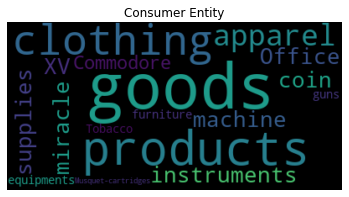

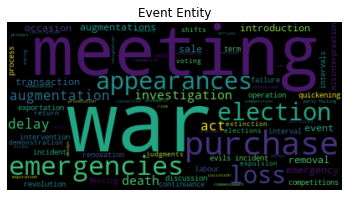

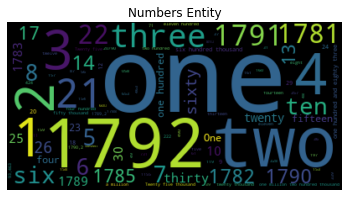

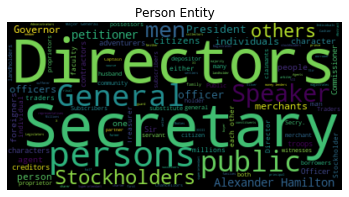

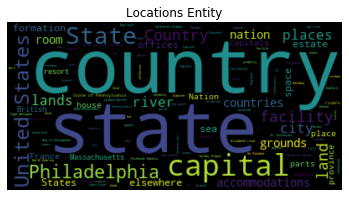

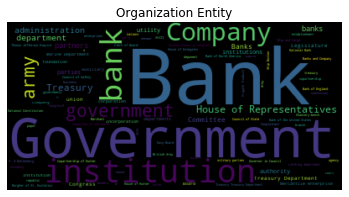

In [7]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate_from_frequencies(Counter(consumers))


# Display the generated image:

plt.title("Consumer Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(events))


# Display the generated image:
plt.title("Event Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(numbers))


# Display the generated image:
plt.title("Numbers Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(persons))


# Display the generated image:
plt.title("Person Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(locations))


# Display the generated image:
plt.title("Locations Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(organizations))


# Display the generated image:
plt.title("Organization Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
a = []
for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    response2 = client.analyze_syntax(document)
    #response3 = client.classify_text(document)
    
    
    
    for j in range(len(response2.tokens)):
        a.append((response2.tokens[j].part_of_speech))
    #    print('Syntax: {}'.format(response2[j]))    
    #print('Sentiment: {}'.format(response1))
    
    #print('Sentiment: {}'.format(response3))
print(a)

[tag: NOUN
number: SINGULAR
proper: PROPER
, tag: NOUN
number: SINGULAR
proper: PROPER
, tag: NOUN
number: SINGULAR
proper: PROPER
, tag: NOUN
number: SINGULAR
, tag: PUNCT
, tag: NUM
, tag: PUNCT
, tag: VERB
tense: PAST
, tag: ADP
, tag: NOUN
number: SINGULAR
proper: PROPER
, tag: NUM
, tag: PUNCT
, tag: NUM
, tag: PUNCT
, tag: NUM
, tag: PUNCT
, tag: ADP
, tag: DET
, tag: NOUN
number: SINGULAR
proper: PROPER
, tag: ADP
, tag: DET
, tag: NOUN
number: SINGULAR
proper: PROPER
, tag: ADP
, tag: NOUN
number: SINGULAR
proper: PROPER
, tag: PUNCT
, tag: ADP
, tag: NOUN
number: SINGULAR
, tag: ADP
, tag: DET
, tag: NOUN
number: SINGULAR
, tag: ADP
, tag: DET
, tag: NOUN
number: SINGULAR
proper: PROPER
, tag: ADP
, tag: NOUN
number: SINGULAR
proper: PROPER
, tag: ADP
, tag: DET
, tag: ADJ
, tag: NOUN
number: SINGULAR
, tag: ADP
, tag: NOUN
number: SINGULAR
proper: PROPER
, tag: NOUN
number: SINGULAR
, tag: PUNCT
, tag: NUM
, tag: VERB
, tag: DET
, tag: NOUN
number: SINGULAR
proper: PROPER
, t

In [16]:
from google.cloud.language import types
for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    response3 = client.classify_text(document)
    
    for j in range(len(response3.categories)):
        print('Classification of Letter '+ txt_files[i][:-4] )
        print((response3.categories[j].name))
        print("")
        print("")
    #print((response3.categories))
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
   # answer = ''
   # if response3 == '':
    #    answer='No Classification Determined'
    
    #else:
    #    answer = response3.name
    #print('Classification: {}'.format(answer))

Classification of Letter Final Version of the Second Report on the Further Provision Necessary for Establishing Public Credit (Report on a National Bank), 13 December 1790
/Law & Government/Government


Classification of Letter Report on a Particular Statement of the Warrants Issued by the Late Superintendent of Finance, and by the Board of Treasury, [25 September 1789]
/Law & Government/Government


Classification of Letter Report on Duties Arising on Tonnage, for the Year Ending September 30, 1790, [6 January 1791]
/Law & Government/Government


Classification of Letter Report on Duties on Imports, [7 January 1791]
/Law & Government/Government


Classification of Letter Report on the Estimate of Expenditures for 1792, 4 November 1791
/Law & Government/Government


Classification of Letter Report on the Petition of Benjamin Brown, [21 November 1792]
/Law & Government/Government


Classification of Letter Report on the Petition of George Blanchard, [21 November 1792]
/Law & Government/